In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

dataset = pd.read_csv('housing_price_dataset.csv')

In [ ]:
dataset.shape

(50000, 6)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [ ]:
dataset.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [2]:
dataset.isnull().sum()
dataset = dataset.dropna()

In [3]:
# One hot encoding
dataset_1 = pd.get_dummies(dataset, columns=['Neighborhood'])
dataset_1 = dataset_1.astype(int)

In [4]:
dataset_1['HouseAge'] = 2024 - dataset['YearBuilt']

In [5]:
dataset_1.drop(columns=['YearBuilt'])

,SquareFeet,Bedrooms,Bathrooms,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban,HouseAge
0,2126,4,1,215355,1,0,0,55
1,2459,3,2,195014,1,0,0,44
2,1860,2,1,306891,0,1,0,54
3,2294,2,1,206786,0,0,1,28
4,2130,5,2,272436,0,1,0,23
...,...,...,...,...,...,...,...,...
49995,1282,5,3,100080,1,0,0,49
49996,2854,2,2,374507,0,1,0,36
49997,2979,5,3,384110,0,1,0,62
49998,2596,5,2,380512,1,0,0,40


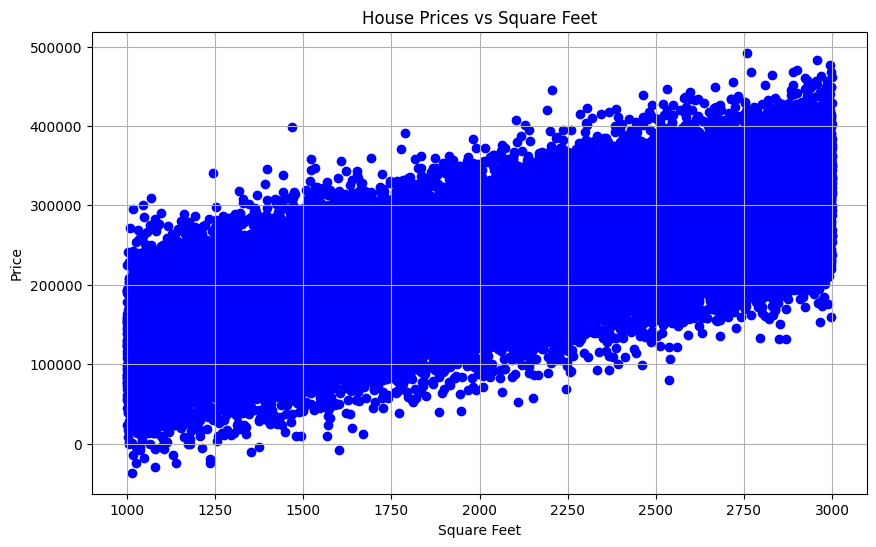

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset_1['SquareFeet'], dataset_1['Price'], color='blue', marker='o')

plt.title('House Prices vs Square Feet')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.grid(True)

In [7]:
dataset_1['Price'] = dataset_1['Price'].astype(int)

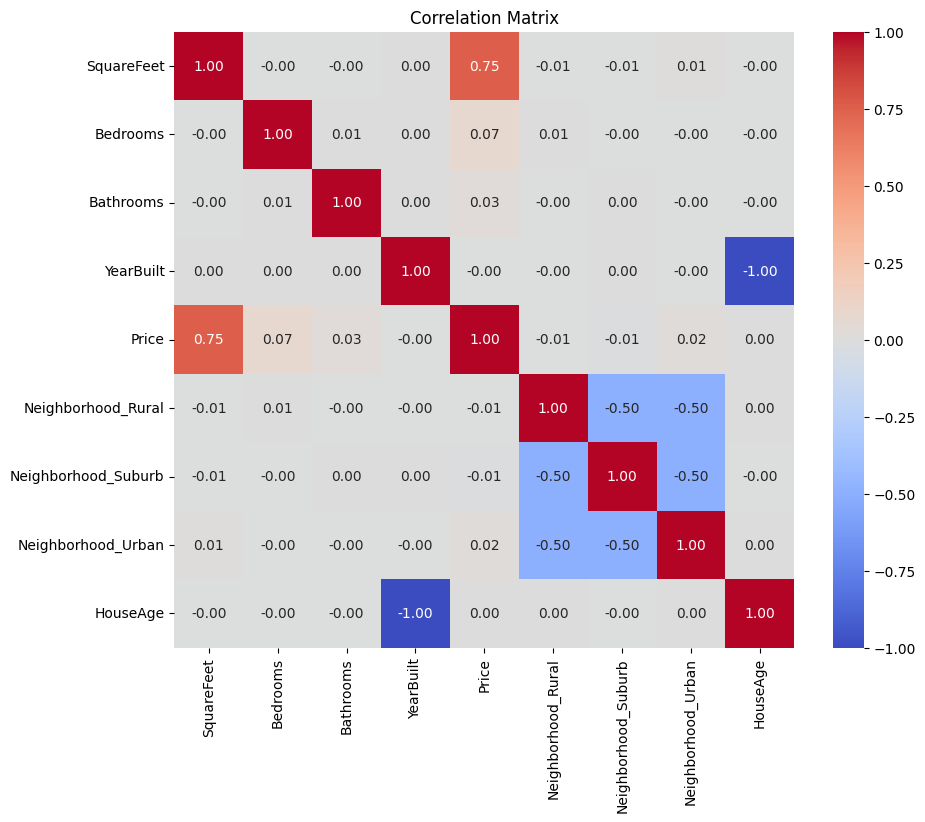

In [8]:
# Correlation Analysis
correlation_matrix = dataset_1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Split the data into features (X) and target (y)
X = dataset_1.drop(columns=['Price'])
y = dataset_1['Price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [11]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Absolute Error (MAE): 42549.89757020714
Mean Squared Error (MSE): 2815415517.320407
R-squared (R2 ): 0.5194672255492192


In [12]:
# Xg boost regressor
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_y_pred = xgb_model.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = mean_squared_error(y_test, xgb_y_pred, squared=False)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print("XGBoost Regressor Performance:")
print(f"Mean Absolute Error (MAE): {xgb_mae}")
print(f"Mean Squared Error (MSE): {xgb_mse}")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse}")
print(f"R-squared (R²): {xgb_r2}")


XGBoost Regressor Performance:
Mean Absolute Error (MAE): 41010.73690546875
Mean Squared Error (MSE): 2621314690.478521
Root Mean Squared Error (RMSE): 51198.776259579885
R-squared (R²): 0.5525961929331507


In [13]:
# Hyperparameter tuning for XGBoost using Randomized Search
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best Hyperparameters for XGBoost:")
print(random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters for XGBoost:
{'subsample': 0.6, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.6}


In [14]:
# Xg boost with new parameters
# Train the best model
best_xgb_model = random_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Make predictions with the best model
best_xgb_y_pred = best_xgb_model.predict(X_test)

# Evaluate the best XGBoost model
best_xgb_mae = mean_absolute_error(y_test, best_xgb_y_pred)
best_xgb_mse = mean_squared_error(y_test, best_xgb_y_pred)
best_xgb_rmse = mean_squared_error(y_test, best_xgb_y_pred, squared=False)
best_xgb_r2 = r2_score(y_test, best_xgb_y_pred)

print("Best XGBoost Regressor Performance:")
print(f"Mean Absolute Error (MAE): {best_xgb_mae}")
print(f"Mean Squared Error (MSE): {best_xgb_mse}")
print(f"Root Mean Squared Error (RMSE): {best_xgb_rmse}")
print(f"R-squared (R²): {best_xgb_r2}")

Best XGBoost Regressor Performance:
Mean Absolute Error (MAE): 40313.2261765625
Mean Squared Error (MSE): 2523721350.6131907
Root Mean Squared Error (RMSE): 50236.65345754224
R-squared (R²): 0.5692533428582316


In [18]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)
lgb_y_pred = lgb_model.predict(X_test)

lgb_mae = mean_absolute_error(y_test, lgb_y_pred)
lgb_mse = mean_squared_error(y_test, lgb_y_pred)
lgb_rmse = mean_squared_error(y_test, lgb_y_pred, squared=False)
lgb_r2 = r2_score(y_test, lgb_y_pred)

print("LightGBM Regressor Performance:")
print(f"Mean Absolute Error (MAE): {lgb_mae}")
print(f"Mean Squared Error (MSE): {lgb_mse}")
print(f"Root Mean Squared Error (RMSE): {lgb_rmse}")
print(f"R-squared (R²): {lgb_r2}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 416
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 8
[LightGBM] [Info] Start training from score 224979.989675
LightGBM Regressor Performance:
Mean Absolute Error (MAE): 40432.94770741896
Mean Squared Error (MSE): 2537037899.637649
Root Mean Squared Error (RMSE): 50369.017259002074
R-squared (R²): 0.5669804853672267
